In [1]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv")
np.random.seed(5)

/home/greatskull/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df.head(20)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [3]:
df.shape

(333, 15)

In [4]:
temp=df[['chas', 'rad','tax']]
df = df.drop(['chas','rad','tax'], axis=1)

In [5]:
#removing outliers
df_new = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]


In [6]:
df.shape, df_new.shape

((333, 12), (325, 12))

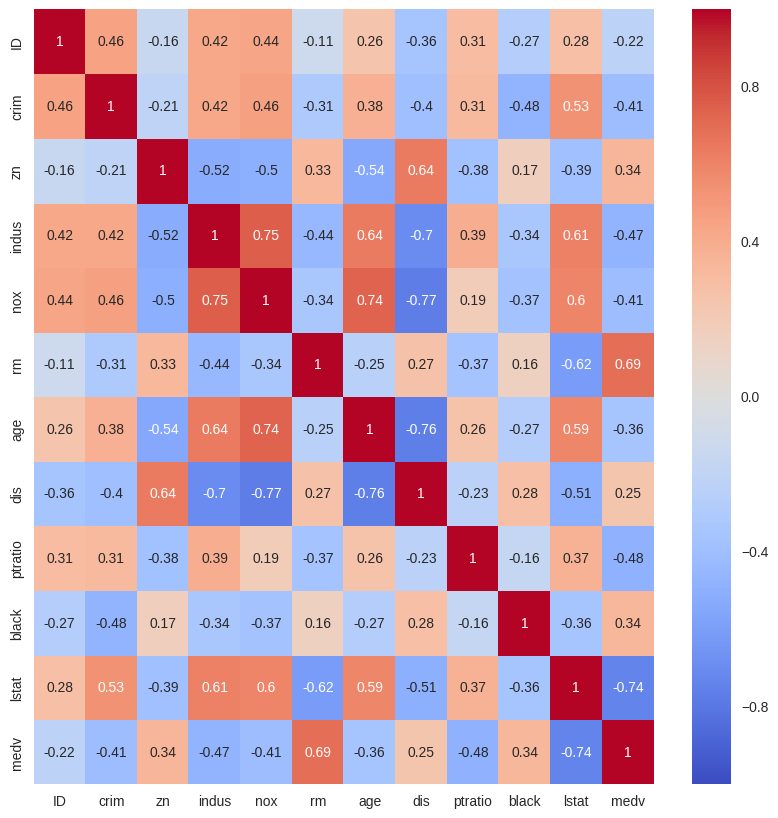

In [7]:
#correlations

corr = df.corr()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr, cmap = "coolwarm", annot = True)

In [8]:
#Normalisation
df_new = ((df_new - df_new.mean())/df_new.std())
#Standardisation
df_new = (df_new - df_new.min())/(df_new.max() - df_new.min())
df_new.head(11)


,ID,crim,zn,indus,nox,rm,age,dis,ptratio,black,lstat,medv
0,0.000000,0.000000,0.180,0.058148,0.314815,0.583656,0.629787,0.308996,0.313953,1.000000,0.089680,0.414414
1,0.001980,0.000733,0.000,0.234444,0.172840,0.553834,0.775532,0.400545,0.604651,1.000000,0.204470,0.360360
2,0.005941,0.000909,0.000,0.053333,0.150206,0.665569,0.423404,0.514848,0.709302,0.993945,0.033389,0.626126
3,0.007921,0.002190,0.000,0.053333,0.150206,0.694423,0.512766,0.514848,0.709302,1.000000,0.099338,0.689189
4,0.011881,0.002861,0.125,0.264074,0.286008,0.474632,0.644681,0.462482,0.302326,0.996532,0.295254,0.389640
5,0.019802,0.007629,0.125,0.264074,0.286008,0.545314,0.939362,0.544543,0.302326,0.988317,0.516556,0.211712
6,0.021782,0.003880,0.125,0.264074,0.286008,0.474051,0.818085,0.532017,0.302326,1.000000,0.318433,0.299550
7,0.023762,0.003053,0.125,0.264074,0.286008,0.450813,0.351064,0.451042,0.302326,0.982928,0.385762,0.362613
8,0.025743,0.021761,0.000,0.274074,0.314815,0.462432,0.593617,0.373449,0.976744,1.000000,0.180188,0.333333
9,0.027723,0.022047,0.000,0.274074,0.314815,0.490899,0.835106,0.347814,0.976744,0.954973,0.235375,0.283784


In [9]:
df_new[['rad','tax']]=temp[['rad','tax']]
X=df_new.drop(['zn','medv'],axis=1)
Y=df_new['medv']
X.shape,Y.shape


((325, 12), (325,))

In [ ]:
def evaluate(X,Y,n):
    
    train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
        model = LinearRegression().fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=sklearn.metrics.mean_squared_error(Y_train, Y_predtrain)
        testloss+=sklearn.metrics.mean_squared_error(Y_test, Y_predtest)
        
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)

In [ ]:
evaluate(X,Y,200)